In [66]:
import os
# Function to rename multiple files
def main():
    i = 0
    path="C:/Users/User/Desktop/flower_dataset/flowers/tulip/"
    for filename in os.listdir(path):
        my_dest ="tulip." + str(i) + ".jpg"
        my_source =path + filename
        my_dest =path + my_dest
        # rename() function will
        # rename all the files
        os.rename(my_source, my_dest)
        i += 1
        
# Driver Code
if __name__ == '__main__':
    # Calling main() function
    main()

In [4]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
df = 'C:/Users/User/Desktop/flower_dataset/'
import os
os.chdir(df)

# import the needed packages
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras
# shortcut to the ImageDataGenerator class
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

SyntaxError: invalid syntax (<ipython-input-133-f188d5ac1197>, line 1)

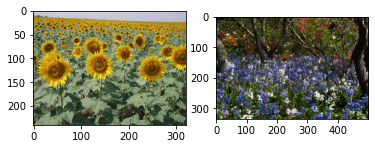

In [18]:
plt.subplot(1,2,1)
plt.imshow(img.imread('sunflower/sunflower.2.jpg'))
plt.subplot(1,2,2)
plt.imshow(img.imread('tulip/tulip.1.jpg'))

In [19]:
images = []
for i in range(10):
    im = img.imread('tulip/tulip.{}.jpg'.format(i))
    images.append(im)
    print('image shape', im.shape, 'maximum color level', im.max())

image shape (209, 320, 3) maximum color level 255
image shape (335, 500, 3) maximum color level 255
image shape (335, 500, 3) maximum color level 255
image shape (333, 500, 3) maximum color level 255
image shape (214, 320, 3) maximum color level 255
image shape (335, 500, 3) maximum color level 255
image shape (333, 500, 3) maximum color level 255
image shape (231, 320, 3) maximum color level 255
image shape (333, 500, 3) maximum color level 255
image shape (332, 500, 3) maximum color level 255


In [20]:
gen = ImageDataGenerator()

In [21]:
iterator = gen.flow_from_directory(
    df,
    target_size=(256,256),
    #class_mode="categorical"
    classes=['tulip', 'sunflower', 'rose', 'dandelion', 'daisy']
)

Found 4317 images belonging to 5 classes.


In [22]:
batch = iterator.next()
len(batch)

2

In [23]:
print(type(batch[0]))
print(type(batch[1]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
print(batch[0].shape)
print(batch[0].dtype)
print(batch[0].max())
print(batch[1].shape)
print(batch[1].dtype)

(32, 256, 256, 3)
float32
255.0
(32, 5)
float32


<ipython-input-27-5ddd2b214449>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.imshow(batch[0][0].astype(np.int))


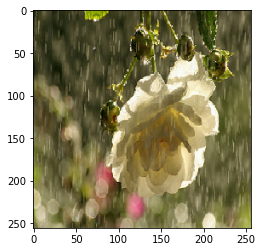

In [27]:
import numpy as np
# we need to cast the image array to integers 
# before plotting as imshow either takes arrays of integers, 
# or arrays of floats normalized to 1. 
plt.imshow(batch[0][0].astype(np.int))

In [28]:
batch[1][0]

array([0., 0., 1., 0., 0.], dtype=float32)

In [35]:
##DataFrog
def plot_images(batch):
    imgs = batch[0]
    labels = batch[1]
    ncols, nrows = 4,8
    fig = plt.figure( figsize=(ncols*3, nrows*3), dpi=90)
    for i, (img,label) in enumerate(zip(imgs,labels)):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(img.astype(np.int))
        x = None
        if label[0]>0:
            x = 'tulip'
        elif label[1]>0:
            x = 'sunflower'
        elif label[2]>0:
            x = 'rose'
        elif label[3]>0:
            x = 'dandelion'
        elif label[4]>0:
            x = 'daisy'
        plt.title( '{} {}'.format(str(label), x))
        plt.axis('off')

<ipython-input-35-94dd180e6d10>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.imshow(img.astype(np.int))


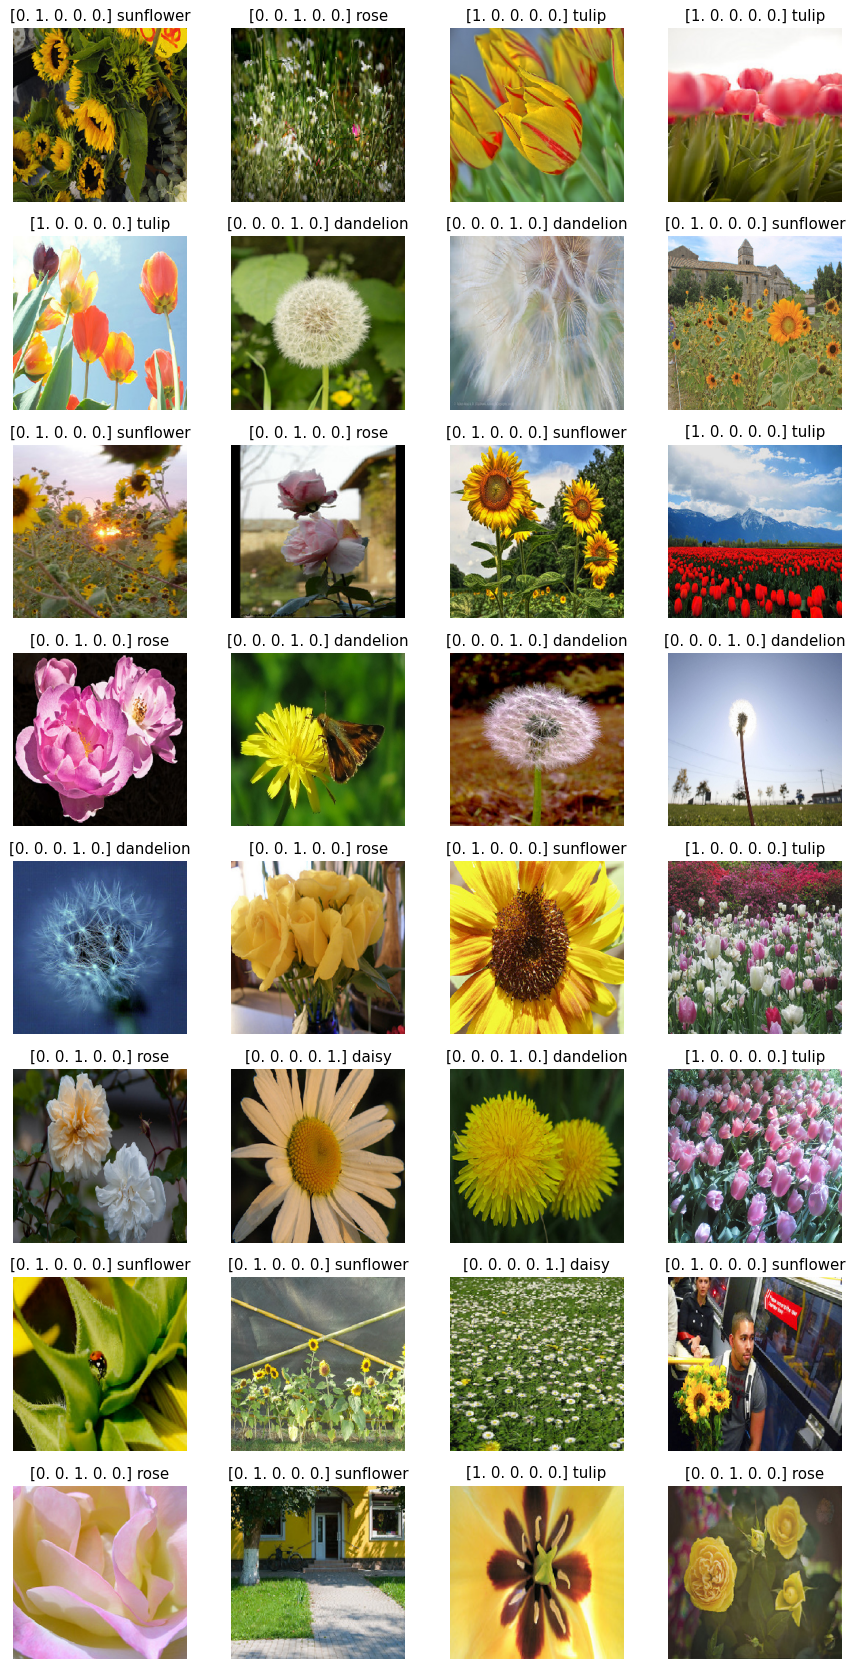

In [36]:
#DataFrog
plot_images(iterator.next())

In [37]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    validation_split = 0.2,
)

In [38]:
batch_size = 30
height, width = (256,256)

train_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = (['tulip', 'sunflower', 'rose', 'dandelion', 'daisy']),
    batch_size = batch_size,
    subset = 'training'
)

val_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = (['tulip', 'sunflower', 'rose', 'dandelion', 'daisy']),
    batch_size = batch_size,
    subset = 'validation'
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [42]:
model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3), 
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.9) )

model.add( keras.layers.Dense(
    5, activation='softmax',
    )
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 252, 252, 24)      1824      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 126, 126, 24)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 122, 122, 48)      28848     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 61, 61, 48)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 57, 57, 96)        115296    
                                                                 
 flatten_1 (Flatten)         (None, 311904)           

In [43]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adamax(lr=0.001),
              metrics=['acc'])

In [44]:
history = model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=20,
)

Epoch 1/20


<ipython-input-44-36b216856306>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


116/116 [==============================] - 256s 2s/step - loss: 1.3006 - acc: 0.4377 - val_loss: 1.1772 - val_acc: 0.4791
Epoch 2/20
116/116 [==============================] - 249s 2s/step - loss: 1.1109 - acc: 0.5404 - val_loss: 1.0791 - val_acc: 0.5616
Epoch 3/20
116/116 [==============================] - 214s 2s/step - loss: 1.0020 - acc: 0.6075 - val_loss: 1.0410 - val_acc: 0.5849
Epoch 4/20
116/116 [==============================] - 231s 2s/step - loss: 0.9167 - acc: 0.6537 - val_loss: 0.9867 - val_acc: 0.6058
Epoch 5/20
116/116 [==============================] - 231s 2s/step - loss: 0.8314 - acc: 0.6896 - val_loss: 1.0065 - val_acc: 0.6244
Epoch 6/20
116/116 [==============================] - 275s 2s/step - loss: 0.7980 - acc: 0.6995 - val_loss: 0.9823 - val_acc: 0.6372
Epoch 7/20
116/116 [==============================] - 268s 2s/step - loss: 0.7346 - acc: 0.7232 - val_loss: 0.8958 - val_acc: 0.6628
Epoch 8/20
116/116 [==============================] - 266s 2s/step - loss: 0.657

In [52]:
def plot_history(history, yrange):
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc, label = 'train_acc')
    plt.plot(epochs, val_acc, label = 'val_acc')
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    plt.legend()
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss,label = 'train_loss')
    plt.plot(epochs, val_loss, label = 'val_loss')
    plt.title('Training and validation loss')
    
    plt.legend()
    plt.show()

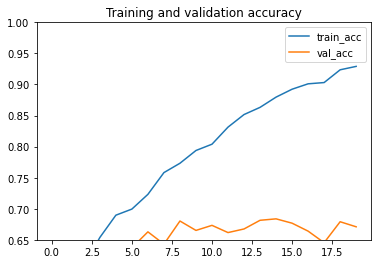

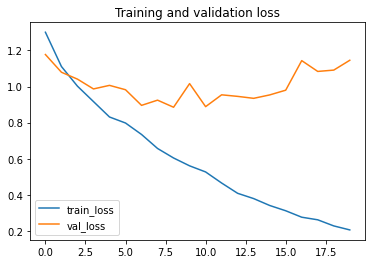

In [53]:
plot_history(history, (0.65, 1.))


In [55]:
model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3), 
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.2) )

model.add( keras.layers.Dense(
    5, activation='softmax',
    )
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 252, 252, 24)      1824      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 126, 126, 24)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 122, 122, 48)      28848     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 61, 61, 48)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 57, 57, 96)        115296    
                                                                 
 flatten_2 (Flatten)         (None, 311904)           

In [56]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adamax(lr=0.001),
              metrics=['acc'])

In [57]:
history = model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=20,
)

Epoch 1/20


<ipython-input-57-36b216856306>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


116/116 [==============================] - 237s 2s/step - loss: 1.4820 - acc: 0.4235 - val_loss: 1.2048 - val_acc: 0.4744
Epoch 2/20
116/116 [==============================] - 229s 2s/step - loss: 1.0697 - acc: 0.5675 - val_loss: 1.0841 - val_acc: 0.5663
Epoch 3/20
116/116 [==============================] - 217s 2s/step - loss: 0.9331 - acc: 0.6407 - val_loss: 1.0132 - val_acc: 0.5977
Epoch 4/20
116/116 [==============================] - 217s 2s/step - loss: 0.7837 - acc: 0.7139 - val_loss: 0.9779 - val_acc: 0.6186
Epoch 5/20
116/116 [==============================] - 213s 2s/step - loss: 0.6554 - acc: 0.7625 - val_loss: 1.0705 - val_acc: 0.5930
Epoch 6/20
116/116 [==============================] - 201s 2s/step - loss: 0.5020 - acc: 0.8247 - val_loss: 1.2521 - val_acc: 0.5791
Epoch 7/20
116/116 [==============================] - 202s 2s/step - loss: 0.3801 - acc: 0.8675 - val_loss: 1.2581 - val_acc: 0.5779
Epoch 8/20
116/116 [==============================] - 210s 2s/step - loss: 0.254

KeyboardInterrupt: 

In [58]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    horizontal_flip = True, 
    validation_split = 0.2,
)

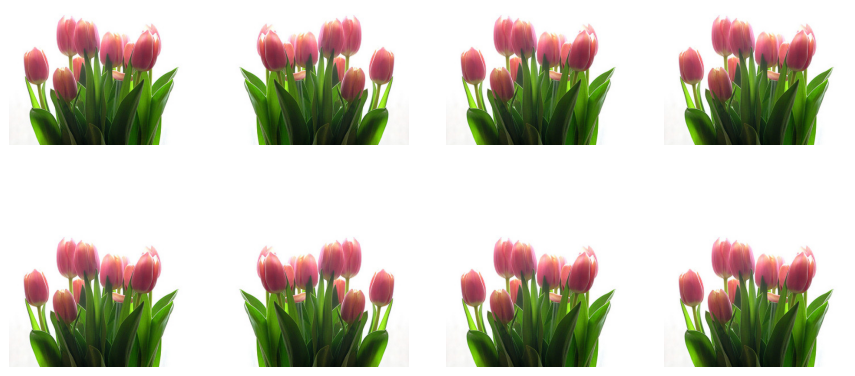

In [59]:
image = img.imread('tulip/tulip.12.jpg')

def plot_transform():
    nrows, ncols = 2,4
    fig = plt.figure(figsize=(ncols*3, nrows*3), dpi=90)
    for i in range(nrows*ncols): 
        timage = imgdatagen.random_transform(image)
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(timage)
        plt.axis('off')
        
plot_transform()

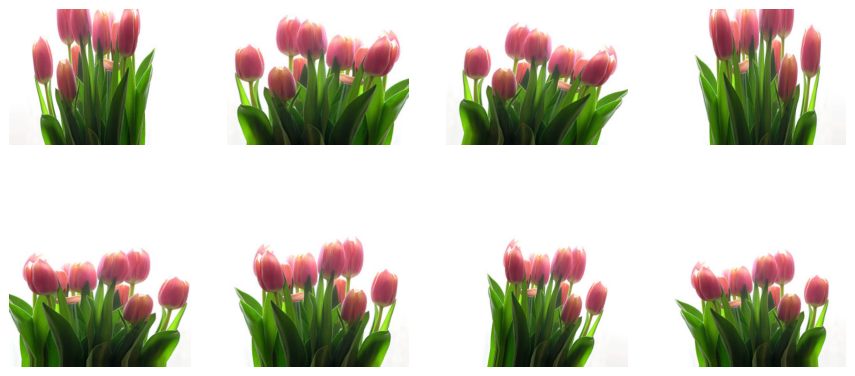

In [60]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    horizontal_flip = True, 
    zoom_range = 0.3, 
    rotation_range = 15.,
    validation_split = 0.1,
)

plot_transform()

In [61]:
batch_size = 30
height, width = (256,256)

train_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = (['tulip', 'sunflower', 'rose', 'dandelion', 'daisy']),
    batch_size = batch_size,
    subset = 'training'
)

val_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = (['tulip', 'sunflower', 'rose', 'dandelion', 'daisy']),
    batch_size = batch_size,
    subset = 'validation'
)

Found 3887 images belonging to 5 classes.
Found 430 images belonging to 5 classes.


In [69]:
model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3), 
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.2) )

model.add( keras.layers.Dense(
    5, activation='softmax',
    )
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 252, 252, 24)      1824      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 126, 126, 24)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 122, 122, 48)      28848     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 61, 61, 48)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 57, 57, 96)        115296    
                                                                 
 flatten_4 (Flatten)         (None, 311904)           

In [70]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adamax(lr=0.001),
              metrics=['acc'])

In [71]:
history_augm = model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=40,
)

<ipython-input-71-48587f411c98>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_augm = model.fit_generator(


Epoch 1/40
130/130 [==============================] - 249s 2s/step - loss: 1.3527 - acc: 0.4507 - val_loss: 1.1304 - val_acc: 0.5535
Epoch 2/40
130/130 [==============================] - 257s 2s/step - loss: 1.0956 - acc: 0.5621 - val_loss: 1.0306 - val_acc: 0.6163
Epoch 3/40
130/130 [==============================] - 269s 2s/step - loss: 1.0013 - acc: 0.6169 - val_loss: 0.9508 - val_acc: 0.6605
Epoch 4/40
130/130 [==============================] - 277s 2s/step - loss: 0.9132 - acc: 0.6553 - val_loss: 0.8936 - val_acc: 0.6674
Epoch 5/40
130/130 [==============================] - 283s 2s/step - loss: 0.8538 - acc: 0.6733 - val_loss: 0.8221 - val_acc: 0.7070
Epoch 6/40
130/130 [==============================] - 294s 2s/step - loss: 0.8147 - acc: 0.6913 - val_loss: 0.8205 - val_acc: 0.7209
Epoch 7/40
130/130 [==============================] - 284s 2s/step - loss: 0.7969 - acc: 0.6884 - val_loss: 0.7792 - val_acc: 0.7140
Epoch 8/40
130/130 [==============================] - 295s 2s/step - 

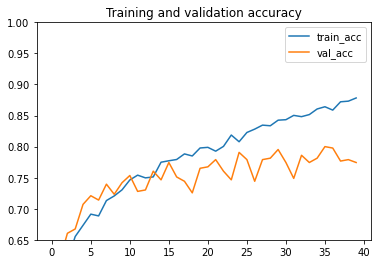

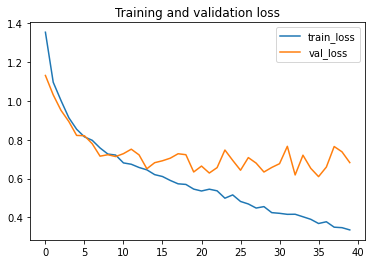

In [72]:
plot_history(history_augm, (0.65, 1))


In [89]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
import keras.utils as image

model = ResNet50(weights='imagenet')

In [90]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [91]:
def evaluate(img_fname):
    img = image.load_img(img_fname, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    # print the probability and category name for the 5 categories 
    # with highest probability: 
    print('Predicted:', decode_predictions(preds, top=5)[0])
    plt.imshow(img)

1/1 [==============================] - 0s 120ms/step
Predicted: [('n11939491', 'daisy', 0.9999945), ('n03930313', 'picket_fence', 7.78965e-07), ('n03223299', 'doormat', 3.8424707e-07), ('n03938244', 'pillow', 2.845348e-07), ('n02206856', 'bee', 2.7243456e-07)]


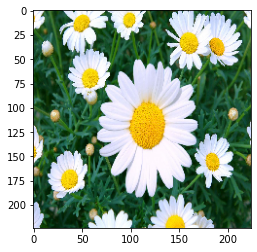

In [93]:
evaluate('flower_0.jpg')


1/1 [==============================] - 0s 142ms/step
Predicted: [('n01531178', 'goldfinch', 0.14340612), ('n12768682', 'buckeye', 0.12328908), ('n02206856', 'bee', 0.11516332), ('n02281406', 'sulphur_butterfly', 0.05180116), ('n11939491', 'daisy', 0.03265644)]


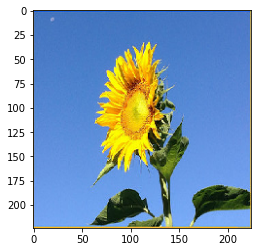

In [132]:
evaluate('sunflower/sunflower.60.jpg')